<a href="https://colab.research.google.com/github/arumr/klasifikasi-kelayakan-air/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonnya","key":"616462dfee4a96adfd298e11358342eb"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d mssmartypants/water-quality

  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 105MB/s]


In [6]:
!mkdir water-quality
!unzip water-quality.zip -d water-quality
!ls water-quality

Archive:  water-quality.zip
  inflating: water-quality/waterQuality1.csv  
waterQuality1.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('water-quality/waterQuality1.csv')
df = df.dropna()
df.sample()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
5261,0.04,25.03,0.06,0.38,0.06,0.01,0.03,1.67,1.19,0.0,...,0.132,1.93,0.66,0.009,0.18,0.56,0.09,0.09,0.03,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [14]:
numerical = []
objcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        objcols.append(col)
for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [15]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [16]:
ind_col = [col for col in df.columns if col != 'is_safe']
dep_col = 'is_safe'

# Transformasi data

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in objcols:
    df[col] = le.fit_transform(df[col])

df['is_safe'] = le.fit_transform(df['is_safe'])

In [18]:
df['is_safe'] = df['is_safe'].replace([0],1)
df[dep_col].value_counts()

1    7087
2     912
Name: is_safe, dtype: int64

In [19]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [21]:
df.to_csv('water-quality/water-quality-clean-datasets.csv')

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

# LOGISTIC REGRESION

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


logreg = LogisticRegression(solver='lbfgs', max_iter=8000)

model = logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy of the model: {0}%'.format(acc))
print(f"\nconfusion matrix: \n {confusion_matrix(y_test,logreg.predict(x_test))}\n")
confusion = confusion_matrix (y_test,logreg.predict(x_test))
tn,fp,fn,tp = confusion.ravel()
print(f"classification report :\n {classification_report(y_test,logreg.predict(x_test))}")

Accuracy of the model: 89.79166666666667%

confusion matrix: 
 [[2086   50]
 [ 195   69]]

classification report :
               precision    recall  f1-score   support

           1       0.91      0.98      0.94      2136
           2       0.58      0.26      0.36       264

    accuracy                           0.90      2400
   macro avg       0.75      0.62      0.65      2400
weighted avg       0.88      0.90      0.88      2400



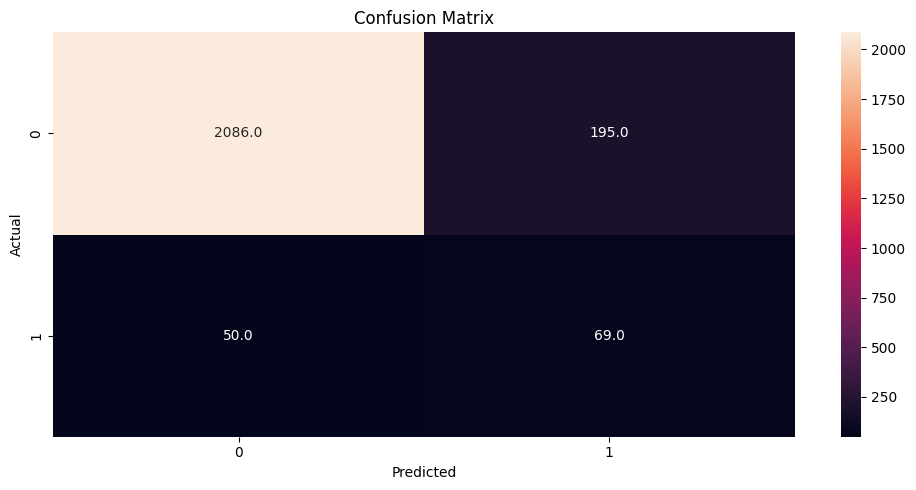

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(logreg.predict(x_test),y_test), annot = True,fmt='.1f')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.tight_layout()

# Simulasi Model

In [25]:
input_data = (2.32,1222,0.01,3.31,0.002,5.28,0.68,0.66,0.9,0.65,0.65,0.1,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05)

input_data_as_numpy_arr= np.array(input_data)

input_data_reshape = input_data_as_numpy_arr.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction[0])
if prediction[0] == 2:
    print('layak dan aman diminum')
else :
    print('tidak layak dan tidak aman diminum')

2
layak dan aman diminum


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
import pickle

filename = 'kualitas_air.sav'
pickle.dump(model,open(filename,'wb'))